In [40]:
import xarray as xr
import matplotlib.pyplot as plt

import os
import json
import xmitgcm as xm

### Import particles results

In [58]:
xr_output = xr.open_zarr("EddyParticles.zarr")

### Check particles trajectories

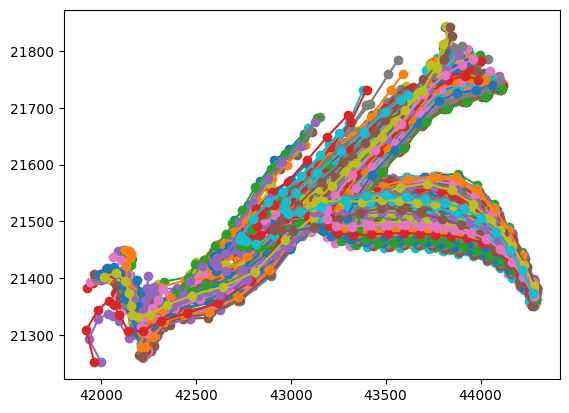

In [64]:
plt.plot(xr_output["lon"].T, xr_output["lat"].T, marker="o");

### Import MITgcm results

In [60]:
model = 'leman_sep2021'
with open('config.json', 'r') as file:
    config_plots = json.load(file)[os.uname().nodename][model]

datapath = config_plots['datapath']
gridpath = config_plots['gridpath']
ref_date = config_plots['ref_date']
dt = config_plots['dt']

In [61]:
# load velocity data
data_vel  = xm.open_mdsdataset(datapath, delta_t=dt,
                            ignore_unknown_vars=True, grid_dir=gridpath, 
                            geometry="cartesian", calendar="standard", ref_date=ref_date, 
                            prefix="3Dsnaps", endian='<')

### Plot everything together

In [62]:
date_start = xr_output.time.values[0,0]
z_start = xr_output['z'].values[0,0]

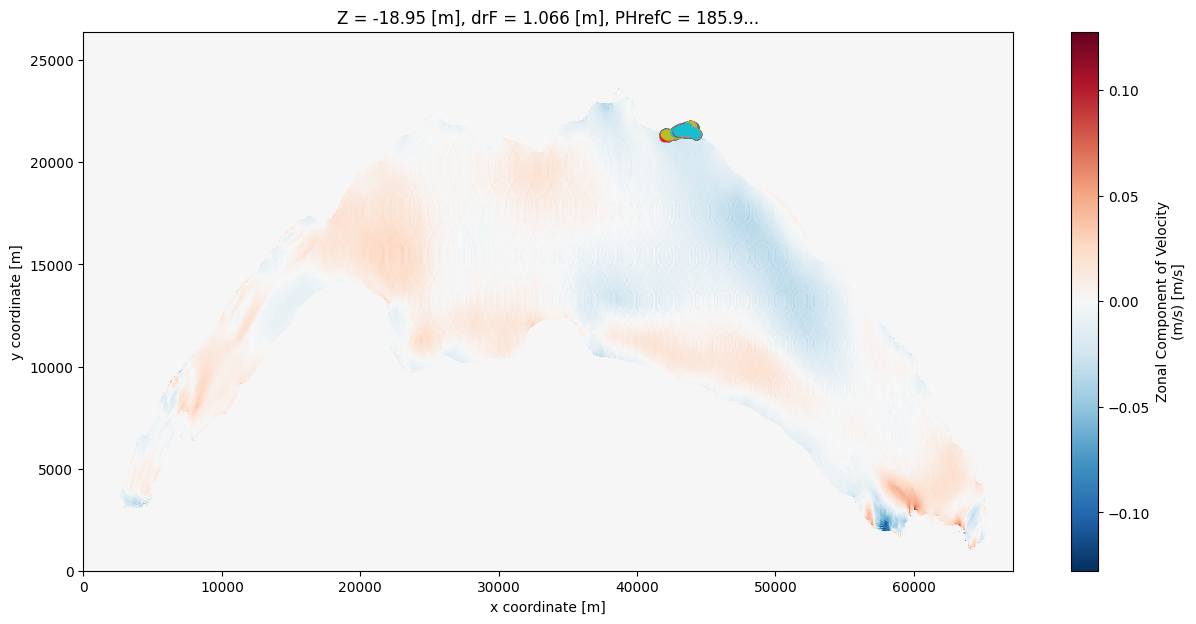

In [65]:
plt.figure(figsize=(15,7))
data_vel['UVEL'].sel(time=date_start, Z=z_start, method='nearest').plot();
plt.plot(xr_output["lon"].T, xr_output["lat"].T, marker="o");